# Heart Disease Prediction Project  
**PRCP-1016 Capstone Project**

**Team ID:**  PTID-CDS-APR-25-2582

**Project ID:** PRCP-1016-HeartDiseasePred  

**Prepared by:** Alvin Reuben Walker

---

### 📄 Problem Statement

Cardiovascular diseases (CVDs) are the leading cause of death globally. This project aims to use patient medical data to develop a machine learning model that predicts the likelihood of heart disease, enabling early diagnosis and intervention.

---

## Task 1: Prepare a complete data analysis report on the given data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')


In [2]:
# Load the datasets
labels_df = pd.read_csv("labels.csv")
values_df = pd.read_csv("values.csv")

# Merge the datasets on 'patient_id'
data = pd.merge(values_df, labels_df, on="patient_id", how="inner")

# Save the merged dataset to a new CSV file
data.to_csv("merged_heart_disease_data.csv", index=False)

In [3]:
data

patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128                2                  0   
1                       110                3                  0   
2                       125                4                  3   
3                       152                4                  0   
4                       178                1                  0   
..                      ...              ...                ...   
175                     125                4                  2   
176                     180                4                  0   
177                     125                3                  0   
178                     124                3                  2   
179                     160                3                  1   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                       0                    2   
1                                       0                    0   
2                                       0                    2   
3                                       0                    0   
4                                       0                    2   
..                                    ...                  ...   
175                                     1                    0   
176                                     0                    1   
177                                     0                    0   
178                                     1                    0   
179                                     0                    0   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                            308                       0.0    1   45   
1                            214                       1.6    0   54   
2                            304                       0.0    1   77   
3                            223                       0.0    1   40   
4                            270                       4.2    1   59   
..                           ...                       ...  ...  ...   
175                          254                       0.2    1   67   
176                          327                       3.4    0   55   
177                          309                       1.8    1   64   
178                          255                       0.0    1   48   
179                          201                       0.0    0   54   

     max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                        170                        0                      0  
1                        158                        0                      0  
2                        162                        1                      1  
3                        181                        0                      1  
4                        145                        0                      0  
..                       ...                      ...                    ...  
175                      163                        0                      1  
176                      117                

In [4]:
# ------------------------------------------
# 🧪 Initial Checks on the Dataset
# ------------------------------------------

# 1. Preview top and bottom records
print("\n--- First 5 Rows ---")
print(data.head())

print("\n--- Last 5 Rows ---")
print(data.tail())

# 2. Shape of the dataset
print("\nDataset Shape (rows, columns):", data.shape)

# 3. Dataset info: column types, non-null counts, memory usage
print("\n--- Dataset Info ---")
data.info()

# 4. Column names
print("\n--- Column Names ---")
print(data.columns.tolist())

# 5. Null value check
print("\n--- Null Value Check ---")
print(data.isnull().sum())

# 6. 'Unknown' values check (non-null but should be treated as missing)
print("\n--- 'Unknown' Value Check ---")
print((data == 'unknown').sum())

# 7. Check for duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())

# 8. Numerical column summary
print("\n--- Numerical Summary ---")
print(data.describe())

# 9. Categorical column summary
print("\n--- Categorical Summary ---")
print(data.describe(include='O'))



--- First 5 Rows ---
  patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     

### 📊 Dataset Overview

- The dataset contains **180 patients** and **15 columns**.
- Each row represents a patient’s health profile.
- The `heart_disease_present` column is the **binary target** variable:
  - 0 = No heart disease
  - 1 = Heart disease present

#### Key Observations:
- No **missing values** or 'unknown' entries.
- No **duplicate rows**.
- The column `thal` is **categorical** with 3 unique values: `normal`, `fixed_defect`, `reversible_defect`.
- `patient_id` is unique and can be dropped from analysis.
- Target variable is **slightly imbalanced** (0.44:0.56 split).




### Data Cleaning

In [5]:
data=data.drop('patient_id',axis=1) 

The column `patient_id` is a **unique identifier** assigned to each patient.

It does **not contain any medical or health-related information** useful for predicting heart disease. Since:

- Every value in `patient_id` is unique (i.e., no repetitions),
- It does not contribute to patterns or relationships in the data,
- Including it might even introduce noise in the machine learning model,

👉 We **dropped `patient_id`** to prevent the model from overfitting on irrelevant information.


# EDA

In [6]:
from ydata_profiling import ProfileReport

# Create profiling report
profile = ProfileReport(data, title="Heart Disease Data Profiling Report", explorative=True)

# Display inside notebook
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 650.30it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Save report to file
profile.to_file("heart_disease_profiling_report.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 📋 EDA Insights Summary (from YData Profiling)

#### 🧼 Data Quality
- ✔️ **No missing values** or 'unknown' placeholders detected in any feature.
- ✔️ All variables have complete data across 180 patients.
- ✔️ No duplicate records were found.

#### 🔍 Univariate Feature Analysis
- **Age**: Ranges from 29 to 77, with a median around 55. Most patients are middle-aged to elderly.
- **Serum Cholesterol**: Mostly between 200–300 mg/dl, with a few outliers above 500.
- **Oldpeak (ST depression)**: Generally under 2.5, but some patients show significant depression, indicating ECG abnormalities.
- **Max Heart Rate**: Ranges from 96 to 202 bpm. A lower maximum heart rate often correlates with heart disease presence.

#### 📊 Categorical Feature Observations
- **Sex**: Around 69% male and 31% female.
- **Thal (Thallium test)**:
  - `normal` – most frequent (≈ 54%)
  - `reversible_defect` and `fixed_defect` are associated with heart issues.
- **Chest Pain Type**: Type 3 (asymptomatic) is the most common, and often linked with heart disease.
- **Fasting Blood Sugar > 120 mg/dl**: Mostly 0 (normal), but elevated levels observed in some heart disease cases.

#### 🔄 Correlation with Target
- Features like **oldpeak**, **chest_pain_type**, **thal**, and **max_heart_rate_achieved** show moderate to strong correlation with `heart_disease_present`.
- **Negative correlation**: `max_heart_rate_achieved`, meaning patients with lower achieved heart rate tend to have heart disease.
- **Positive correlation**: `oldpeak`, `thal`, and `chest_pain_type`, indicating stronger risk.

#### 📌 Key Insights
- Patients with **higher ST depression**, **abnormal thallium results**, and **atypical chest pain** are more likely to have heart disease.
- These features will be crucial in model training and feature selection.


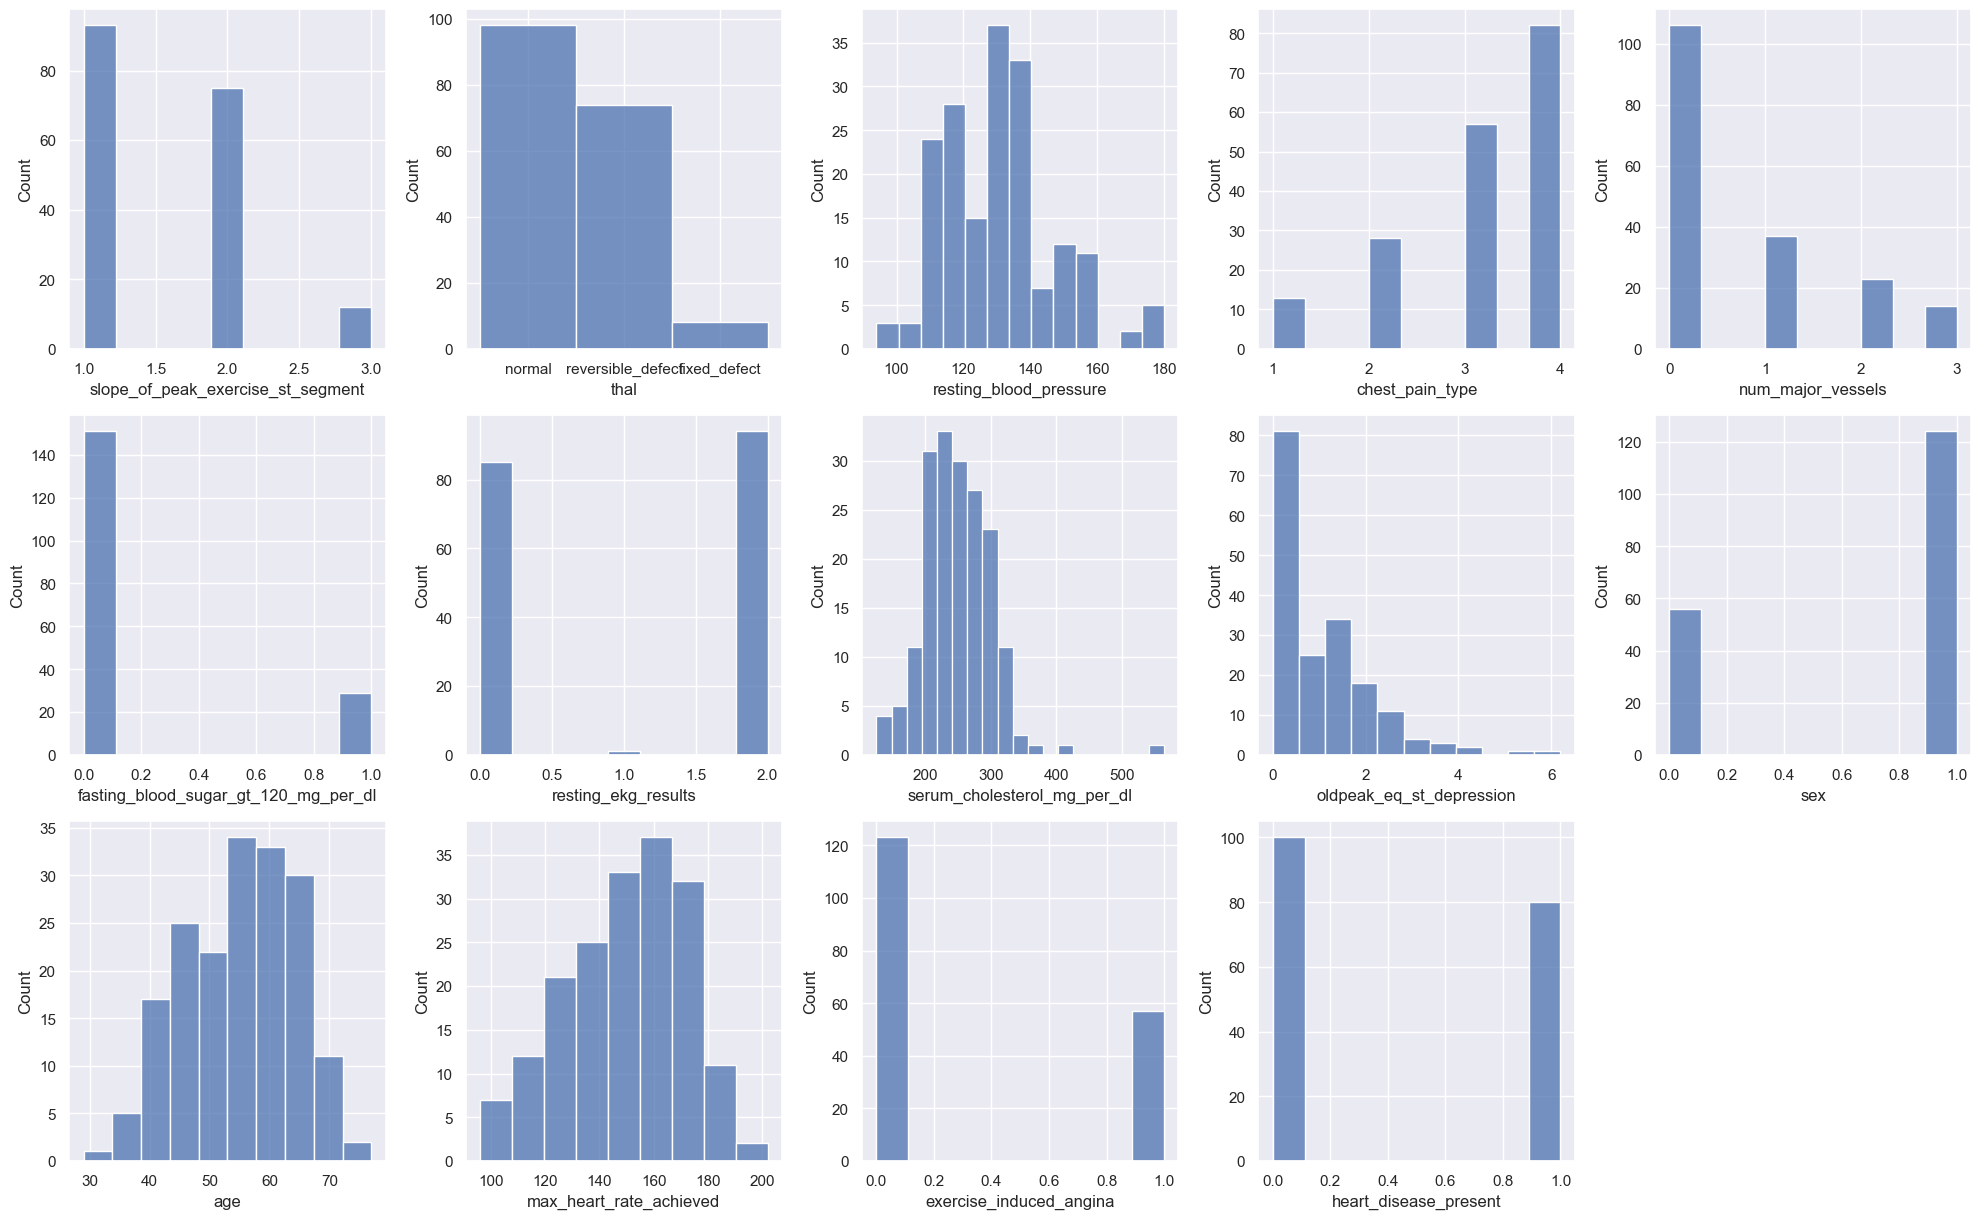

In [8]:
#Univariate analysis
plt.figure(figsize=(20,20))
plotnum=1
for column in data:
    plt.subplot(5,5,plotnum)
    sns.histplot(data[column])
    plotnum = plotnum+1
plt.tight_layout()
plt.show()

### 📊 EDA Insights Summary from Visualizations

#### 1. **Target Distribution – `heart_disease_present`**
- Fairly balanced:
  - ~56% of patients have heart disease.
  - ~44% do not.
- Indicates that class imbalance is minimal, so basic models may perform well without advanced resampling.

#### 2. **Categorical Features**
- **Sex**:
  - Males dominate the dataset (~69%), females ~31%.
- **Thal**:
  - Majority are labeled as `normal`, followed by `reversible_defect`.
  - `fixed_defect` is the least frequent but significant for prediction.
- **Chest Pain Type**:
  - Type 4 is most frequent, followed by type 3. Types 1 and 2 are rare.
- **Fasting Blood Sugar**:
  - Most patients have normal fasting sugar (0); very few are elevated (1).
- **Exercise-Induced Angina**:
  - Majority do not have angina (0), but a significant portion does (1).

#### 3. **Numerical Features**
- **Age**:
  - Mostly between 40 and 65 years. Peak concentration around 55.
- **Resting Blood Pressure**:
  - Mostly ranges from 110 to 150 mm Hg. Mild right-skewed.
- **Serum Cholesterol**:
  - Majority are under 300 mg/dl. A few outliers go beyond 500.
- **Oldpeak (ST Depression)**:
  - Positively skewed. Most values are near 0, but some go up to 6.2 — potentially critical for prediction.
- **Max Heart Rate Achieved**:
  - Normally distributed around 150 bpm. Tail drops off after 170.
- **Num Major Vessels**:
  - Most patients have 0 or 1 major vessel visible in fluoroscopy.

#### 4. **Resting ECG Results**
- `0` and `2` are most frequent; `1` is very rare.
- May require encoding or combining with clinical meaning.

---

✅ **Conclusion**:
These univariate insights provide a clear view of feature distributions and help identify:
- Outliers (`serum_cholesterol`, `oldpeak`)
- Skewness (`oldpeak`, `max_heart_rate_achieved`)
- Binary imbalance (`sex`, `thal`, `exercise_induced_angina`)

We will use this understanding to guide preprocessing and feature engineering for model development.


In [9]:
#Bivariate analysis
data1 = data[['thal']]
data2 = data[['slope_of_peak_exercise_st_segment', 'resting_blood_pressure','chest_pain_type', 'num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl', 
              'resting_ekg_results','serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age','max_heart_rate_achieved', 'exercise_induced_angina']]
#Here data1 is categorical and data2 is numerical

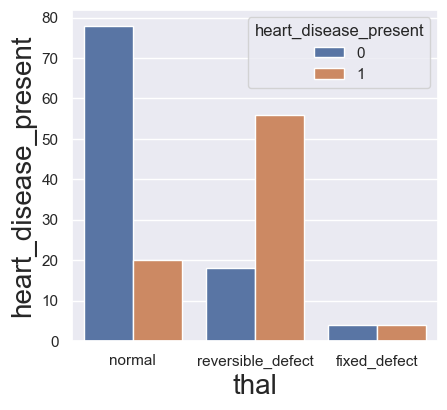

In [10]:
#analyzing data1 with our target variable 'heart_disease_present'
plt.figure(figsize=(20,20),facecolor='white') #To set canvas
plotnumber = 1 
for column in data1:
    if plotnumber<=20:   #here 20 is given based on number of columns and subplot size
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(x=data1[column], hue=data['heart_disease_present'])
        plt.xlabel(column,fontsize=20) 
        plt.ylabel('heart_disease_present',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

####  Output – `thal` vs. `heart_disease_present`:
- Patients with a **normal** thallium test result are mostly **not diagnosed** with heart disease.
- Those with **reversible defects** show a higher frequency of **heart disease presence**.
- `Fixed defect` category is less frequent but still associated with some heart disease cases.

This approach provides a comprehensive visual summary of how categorical features contribute to the classification task and will help in feature selection for modeling.

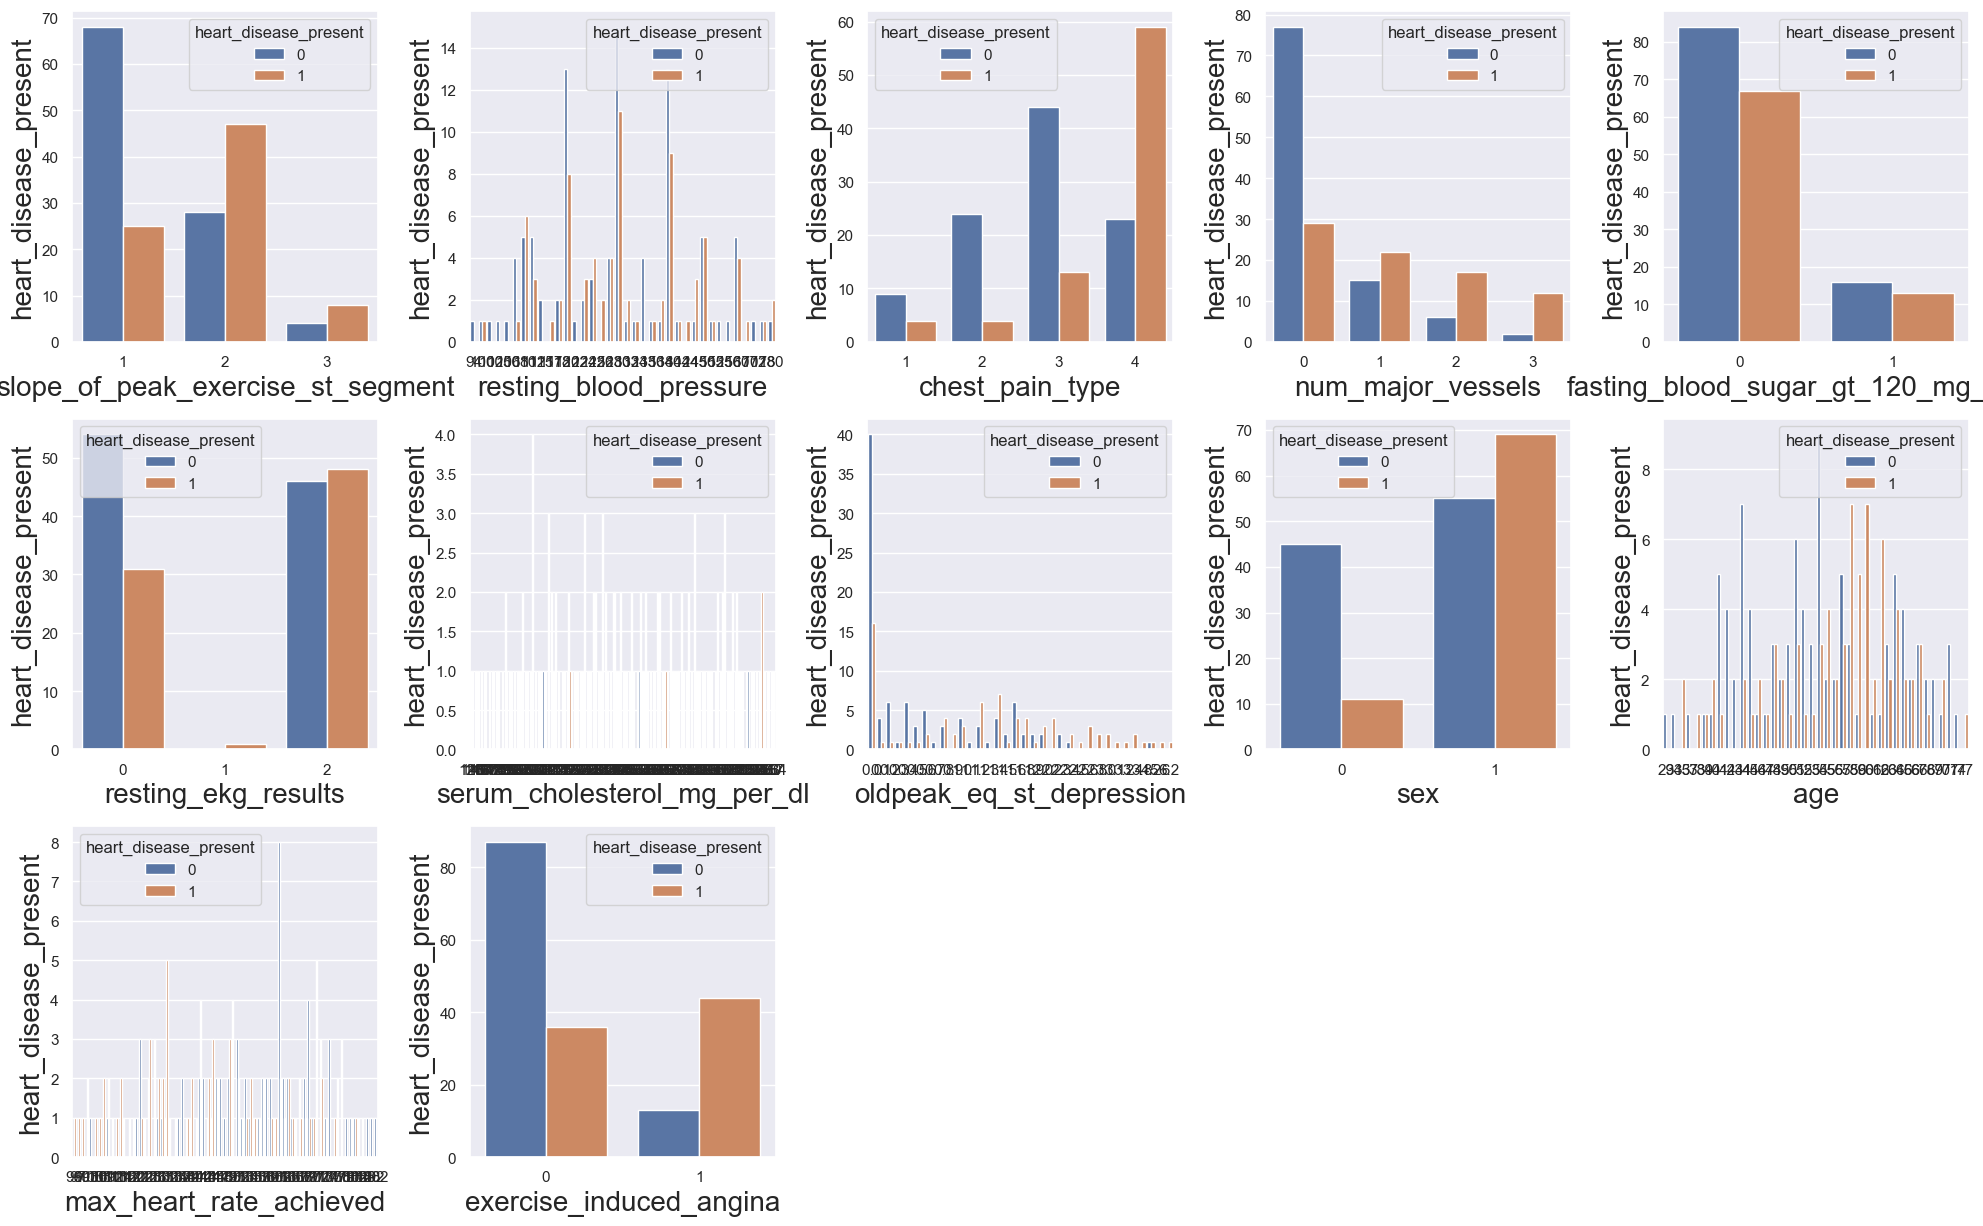

In [11]:
#analyzing data2 with our target variable 'heart_disease_present'
plt.figure(figsize=(20,20),facecolor='white') #To set canvas
plotnumber = 1 
for column in data2:
    if plotnumber<=20:   #here 20 is given based on number of columns and subplot size
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(x=data2[column],hue=data['heart_disease_present'])
        plt.xlabel(column,fontsize=20) 
        plt.ylabel('heart_disease_present',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### 🔄 Bivariate Analysis: Feature vs. Heart Disease Presence

To investigate how each feature contributes to heart disease prediction, we visualized all features against the target variable `heart_disease_present`.

#### ✅ Observations:

- **Slope of ST Segment**:
  - Slope type `1` is more common in healthy patients.
  - Slope types `2` and `3` appear more frequently in heart disease cases.

- **Chest Pain Type**:
  - Type `4` (asymptomatic) shows a strong association with heart disease.
  - Type `2` (non-anginal pain) is mostly seen in non-diseased patients.

- **Thal**:
  - `Reversible defect` thallium test results dominate in heart disease cases.
  - `Normal` thalium is more common in healthy individuals.

- **Exercise-Induced Angina**:
  - Most patients with angina (`1`) have heart disease.
  - Angina absence (`0`) is more common in non-diseased patients.

- **Oldpeak (ST depression)**:
  - Higher depression values correlate strongly with heart disease presence.

- **Max Heart Rate Achieved**:
  - Lower heart rate tends to indicate heart disease.

- **Sex**:
  - Males (`1`) have a noticeably higher rate of heart disease than females.

- **Fasting Blood Sugar**:
  - Most patients have normal levels (`0`). Slightly higher heart disease rates for elevated sugar (`1`).

- **Number of Major Vessels**:
  - A higher number of visible major vessels correlates with increased heart disease risk.

- **Age**:
  - Older patients (55+) show a higher frequency of heart disease, though the relation is gradual.

- **Resting Blood Pressure & Cholesterol**:
  - No clear linear separation with heart disease, but extreme values are more common among affected individuals.

#### 🧠 Conclusion:
Features such as **thal**, **chest_pain_type**, **oldpeak**, **max_heart_rate_achieved**, and **slope_of_peak_exercise_st_segment** are visibly impactful. These findings support our decision to include them in the model and highlight their clinical significance.


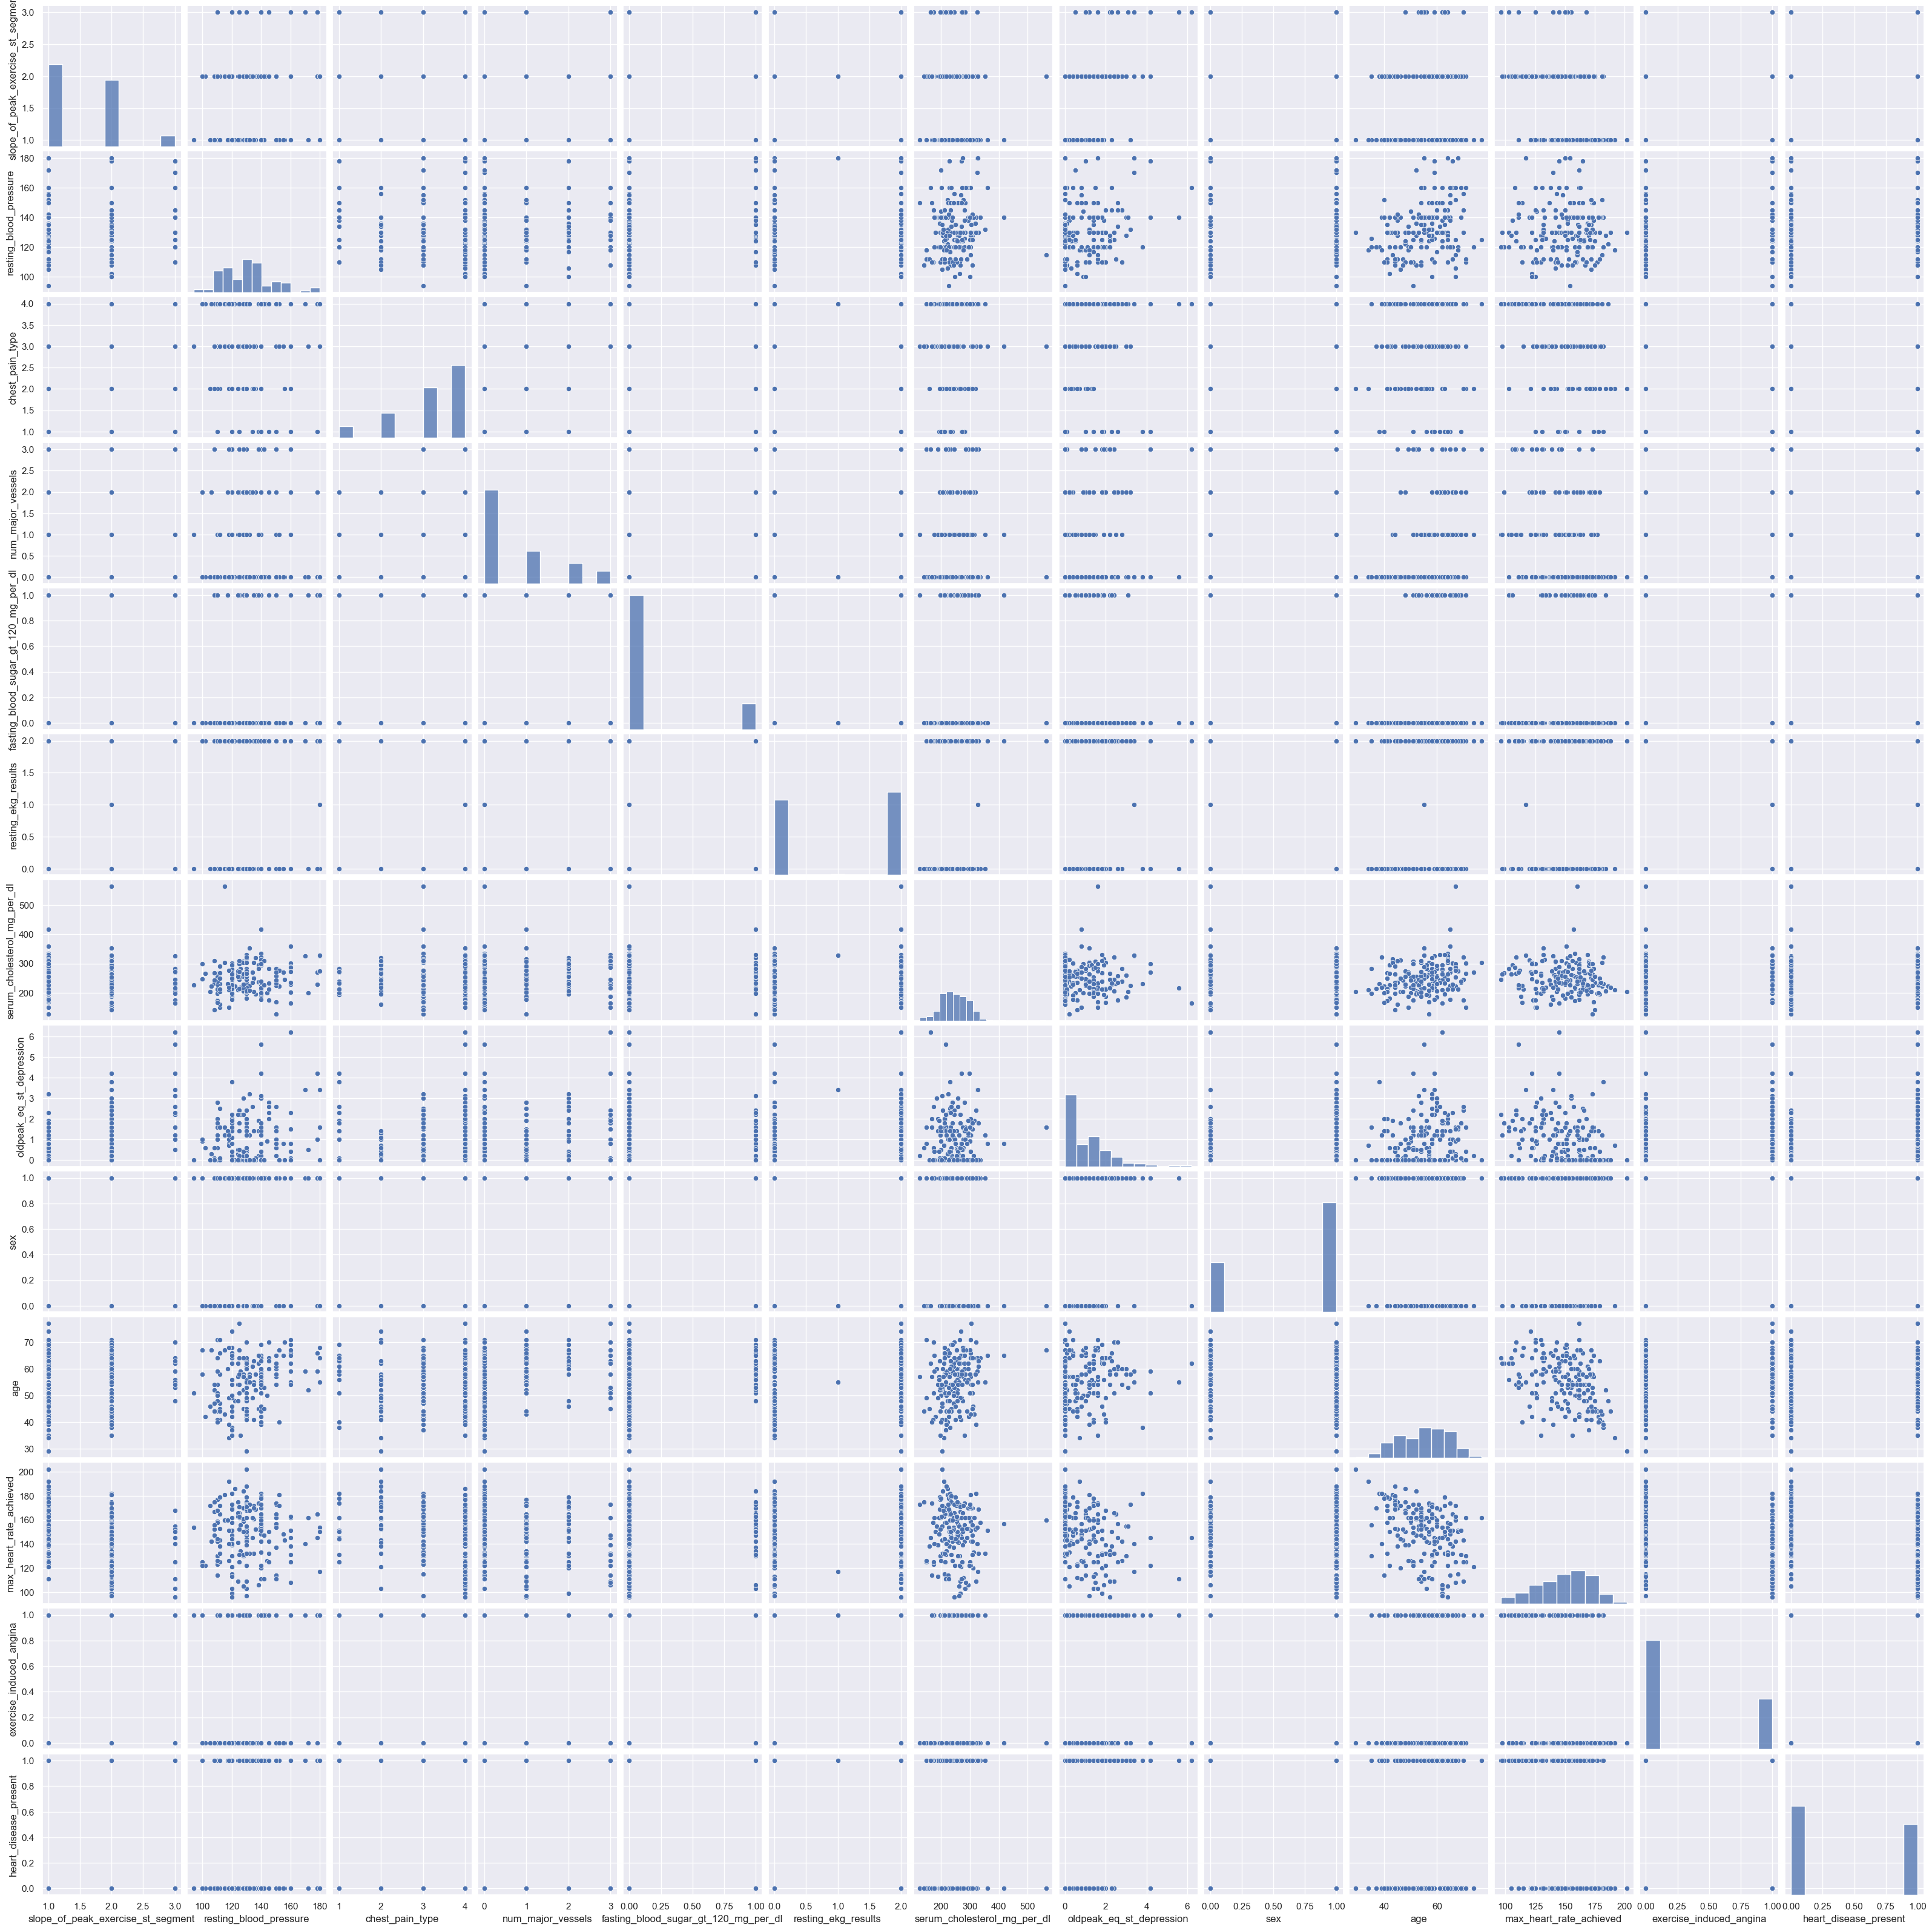

In [12]:
#Multii variate analysis
sns.pairplot(data=data)
plt.show()

### 🔁 Multivariate Analysis – Pairplot of Input Features

To explore interactions between input features and their joint behavior, a pairplot was generated using all key numerical variables.

#### 🔍 Visual Observations:

- **Age & Max Heart Rate Achieved**:
  - As age increases, max heart rate tends to decrease, especially among heart disease patients.

- **Oldpeak vs Other Features**:
  - `oldpeak_eq_st_depression` shows clearer spread and higher values in heart disease cases.
  - Strong visual separation when paired with `max_heart_rate_achieved`.

- **Cholesterol vs Resting Blood Pressure**:
  - Mild positive association visible, with some extreme outliers.

- **Discrete Variable Bands**:
  - Several features (e.g., `resting_ekg_results`, `num_major_vessels`) appear as vertical stripes due to limited unique values, confirming their **categorical/discrete** nature despite being encoded as numeric.

#### ✅ Conclusion:
This pairplot provides critical insight into how combinations of variables interact. Key interactions such as **oldpeak vs heart rate**, and **age vs max heart rate**, will influence both feature selection and modeling strategy.


### Data Preprocessing

In [13]:
data

slope_of_peak_exercise_st_segment               thal  \
0                                    1             normal   
1                                    2             normal   
2                                    1             normal   
3                                    1  reversible_defect   
4                                    3  reversible_defect   
..                                 ...                ...   
175                                  2  reversible_defect   
176                                  2             normal   
177                                  2  reversible_defect   
178                                  1             normal   
179                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128                2                  0   
1                       110                3                  0   
2                       125                4                  3   
3                       152                4                  0   
4                       178                1                  0   
..                      ...              ...                ...   
175                     125                4                  2   
176                     180                4                  0   
177                     125                3                  0   
178                     124                3                  2   
179                     160                3                  1   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                       0                    2   
1                                       0                    0   
2                                       0                    2   
3                                       0                    0   
4                                       0                    2   
..                                    ...                  ...   
175                                     1                    0   
176                                     0                    1   
177                                     0                    0   
178                                     1                    0   
179                                     0                    0   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                            308                       0.0    1   45   
1                            214                       1.6    0   54   
2                            304                       0.0    1   77   
3                            223                       0.0    1   40   
4                            270                       4.2    1   59   
..                           ...                       ...  ...  ...   
175                          254                       0.2    1   67   
176                          327                       3.4    0   55   
177                          309                       1.8    1   64   
178                          255                       0.0    1   48   
179                          201                       0.0    0   54   

     max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                        170                        0                      0  
1                        158                        0                      0  
2                        162                        1                      1  
3                        181                        0                      1  
4                        145                        0                      0  
..                       ...                      ...                    ...  
175                      163                        0                      1  
176                      117                        1                      1  
177                      131                        1                      1  
178                

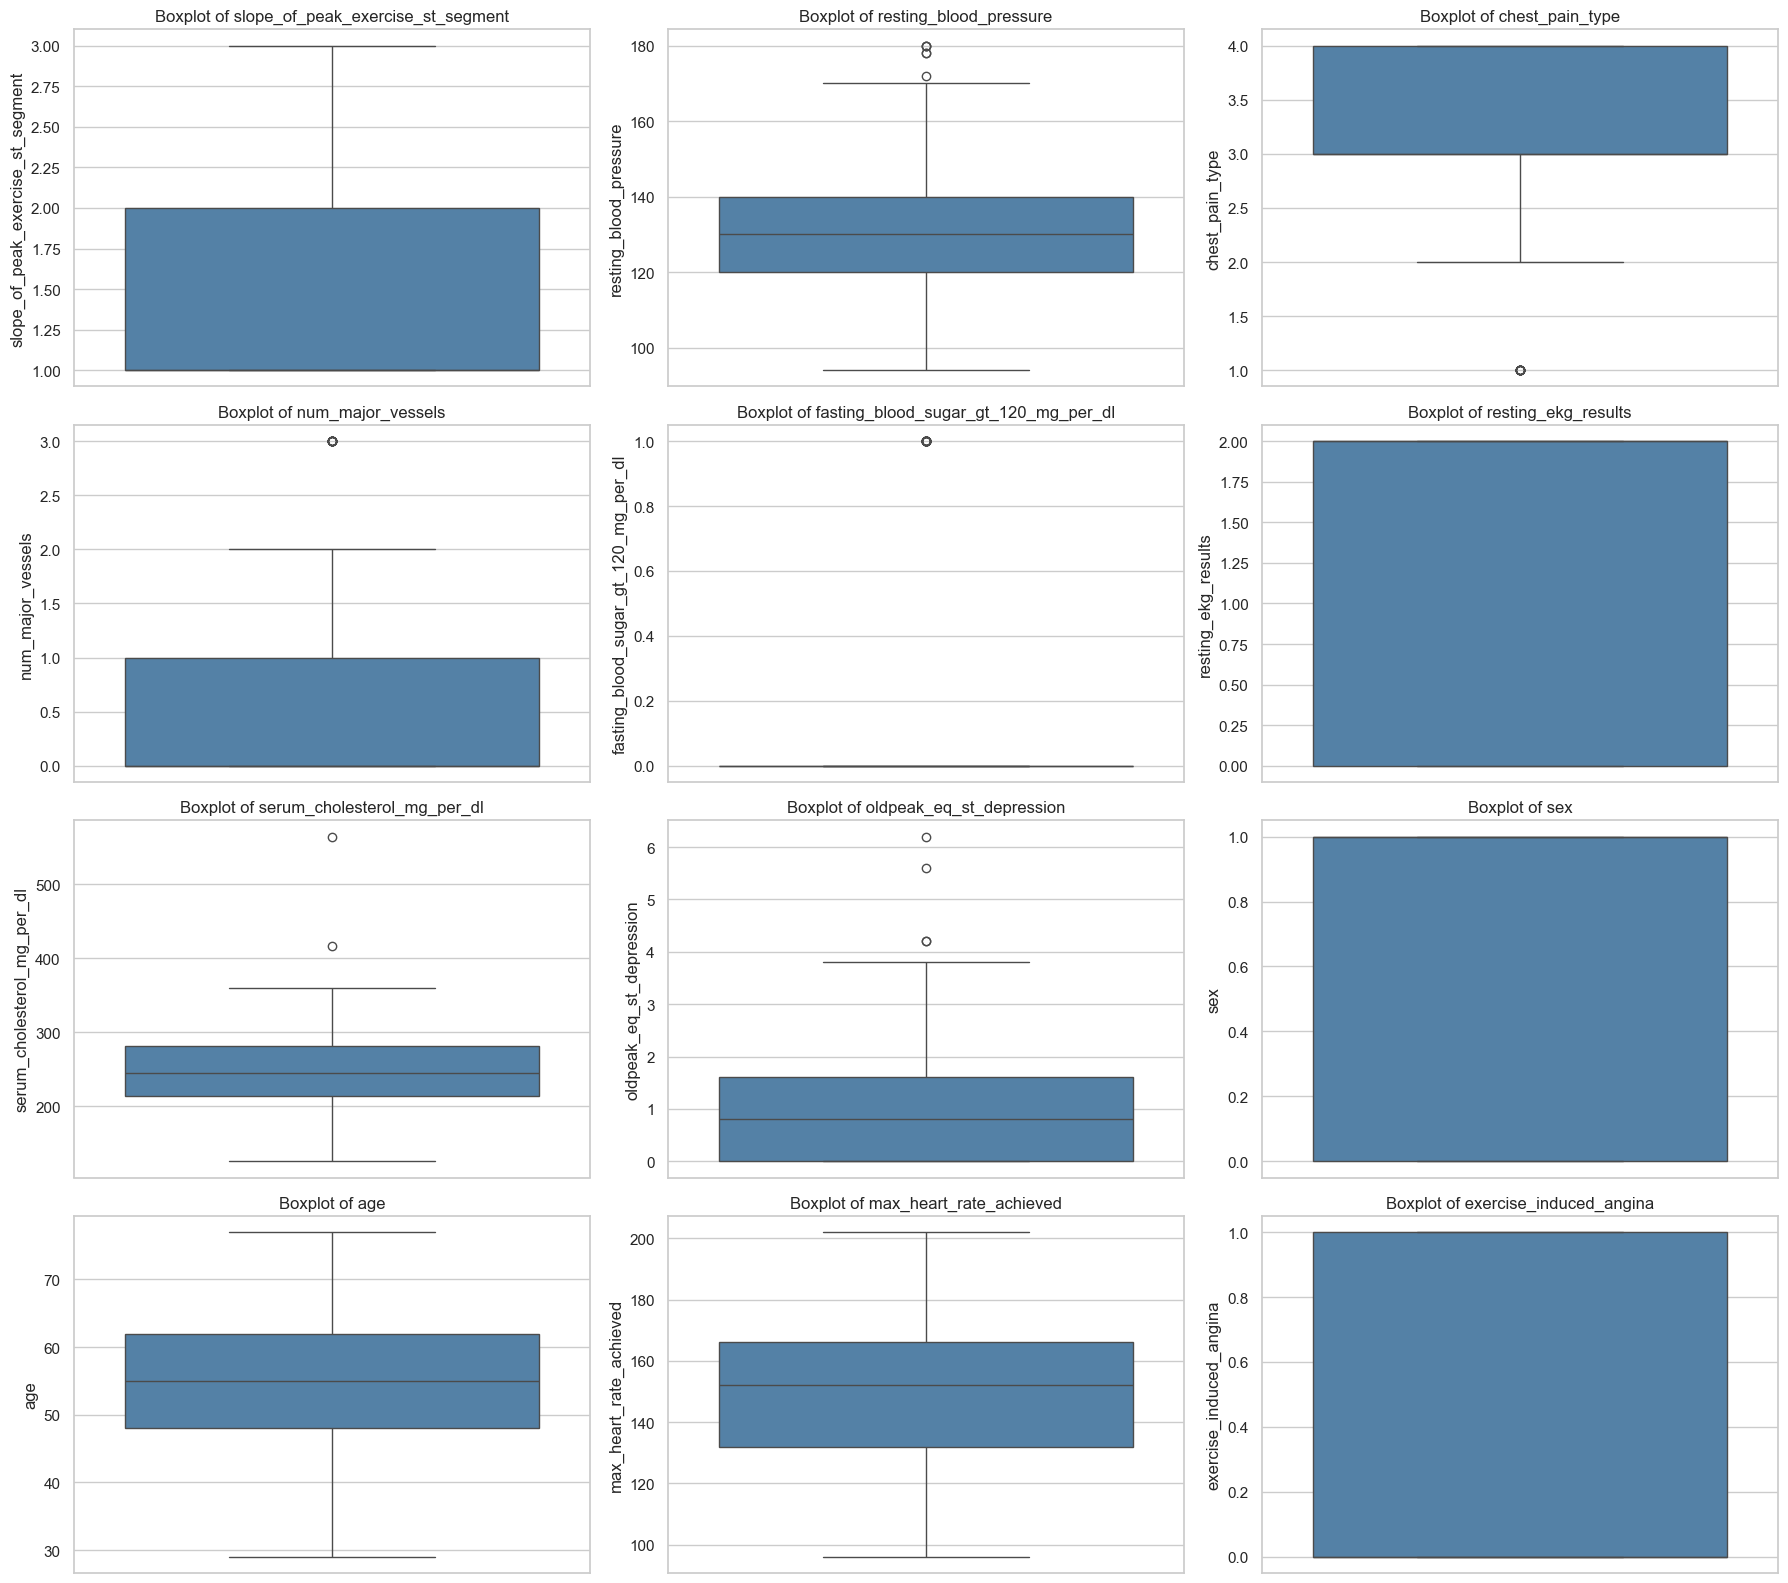

In [15]:
import math

# Select only numeric features (excluding target if needed)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('heart_disease_present')  # Skip the target

# Set number of rows and columns for subplot grid
n_cols = 3  # Number of plots per row
n_rows = math.ceil(len(numerical_cols) / n_cols)  # Rows based on number of features

# Set the figure size
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Loop to create each subplot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[col], color='steelblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel("")  # Remove x-axis label

# Adjust layout
plt.tight_layout()
plt.show()

### 📦 Outlier Detection using Boxplots

To identify potential outliers in the dataset, boxplots were generated for all numerical features.

#### 🔍 Key Observations:
- **Outliers Detected**:
  - `serum_cholesterol_mg_per_dl`: Has a few very high values beyond the upper whisker.
  - `oldpeak_eq_st_depression`: Several values >4, which may indicate abnormal ECG readings.
  - `age`: Some values above 75+ are present but still within realistic medical ranges.
  - `resting_blood_pressure`: A few points above 150 stand out.

- **Binary/Discrete Columns** (e.g., `sex`, `fasting_blood_sugar_gt_120_mg_per_dl`, `resting_ekg_results`) do not display meaningful outlier behavior due to limited unique values.

#### 🧠 Insight:
The outliers observed are **clinically plausible** and should be carefully evaluated before removal. Medical data often includes valid extreme values. Hence, **outlier treatment will be handled feature-wise using domain context and model sensitivity.**


In [17]:
# Make a copy to avoid modifying the original dataset
iqr_data = data.copy()

In [18]:
# List of numerical columns to check (excluding the target)
numerical_cols = iqr_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('heart_disease_present')

In [22]:
# Dictionary to store outlier counts
outlier_counts = {}

# Loop through each numerical feature
for col in numerical_cols:
    Q1 = iqr_data[col].quantile(0.25)
    Q3 = iqr_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = iqr_data[(iqr_data[col] < lower_bound) | (iqr_data[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    # Remove outliers from the dataset
    iqr_data = iqr_data[(iqr_data[col] >= lower_bound) & (iqr_data[col] <= upper_bound)]


In [23]:
# Display outlier count per column
print("Outlier count per column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outlier count per column:
slope_of_peak_exercise_st_segment: 0
resting_blood_pressure: 6
chest_pain_type: 12
num_major_vessels: 14
fasting_blood_sugar_gt_120_mg_per_dl: 18
resting_ekg_results: 0
serum_cholesterol_mg_per_dl: 1
oldpeak_eq_st_depression: 1
sex: 0
age: 0
max_heart_rate_achieved: 0
exercise_induced_angina: 0


In [24]:
# Show new shape of dataset
print(f"\nOriginal rows: {data.shape[0]}")
print(f"Rows after outlier removal: {iqr_data.shape[0]}")


Original rows: 180
Rows after outlier removal: 128


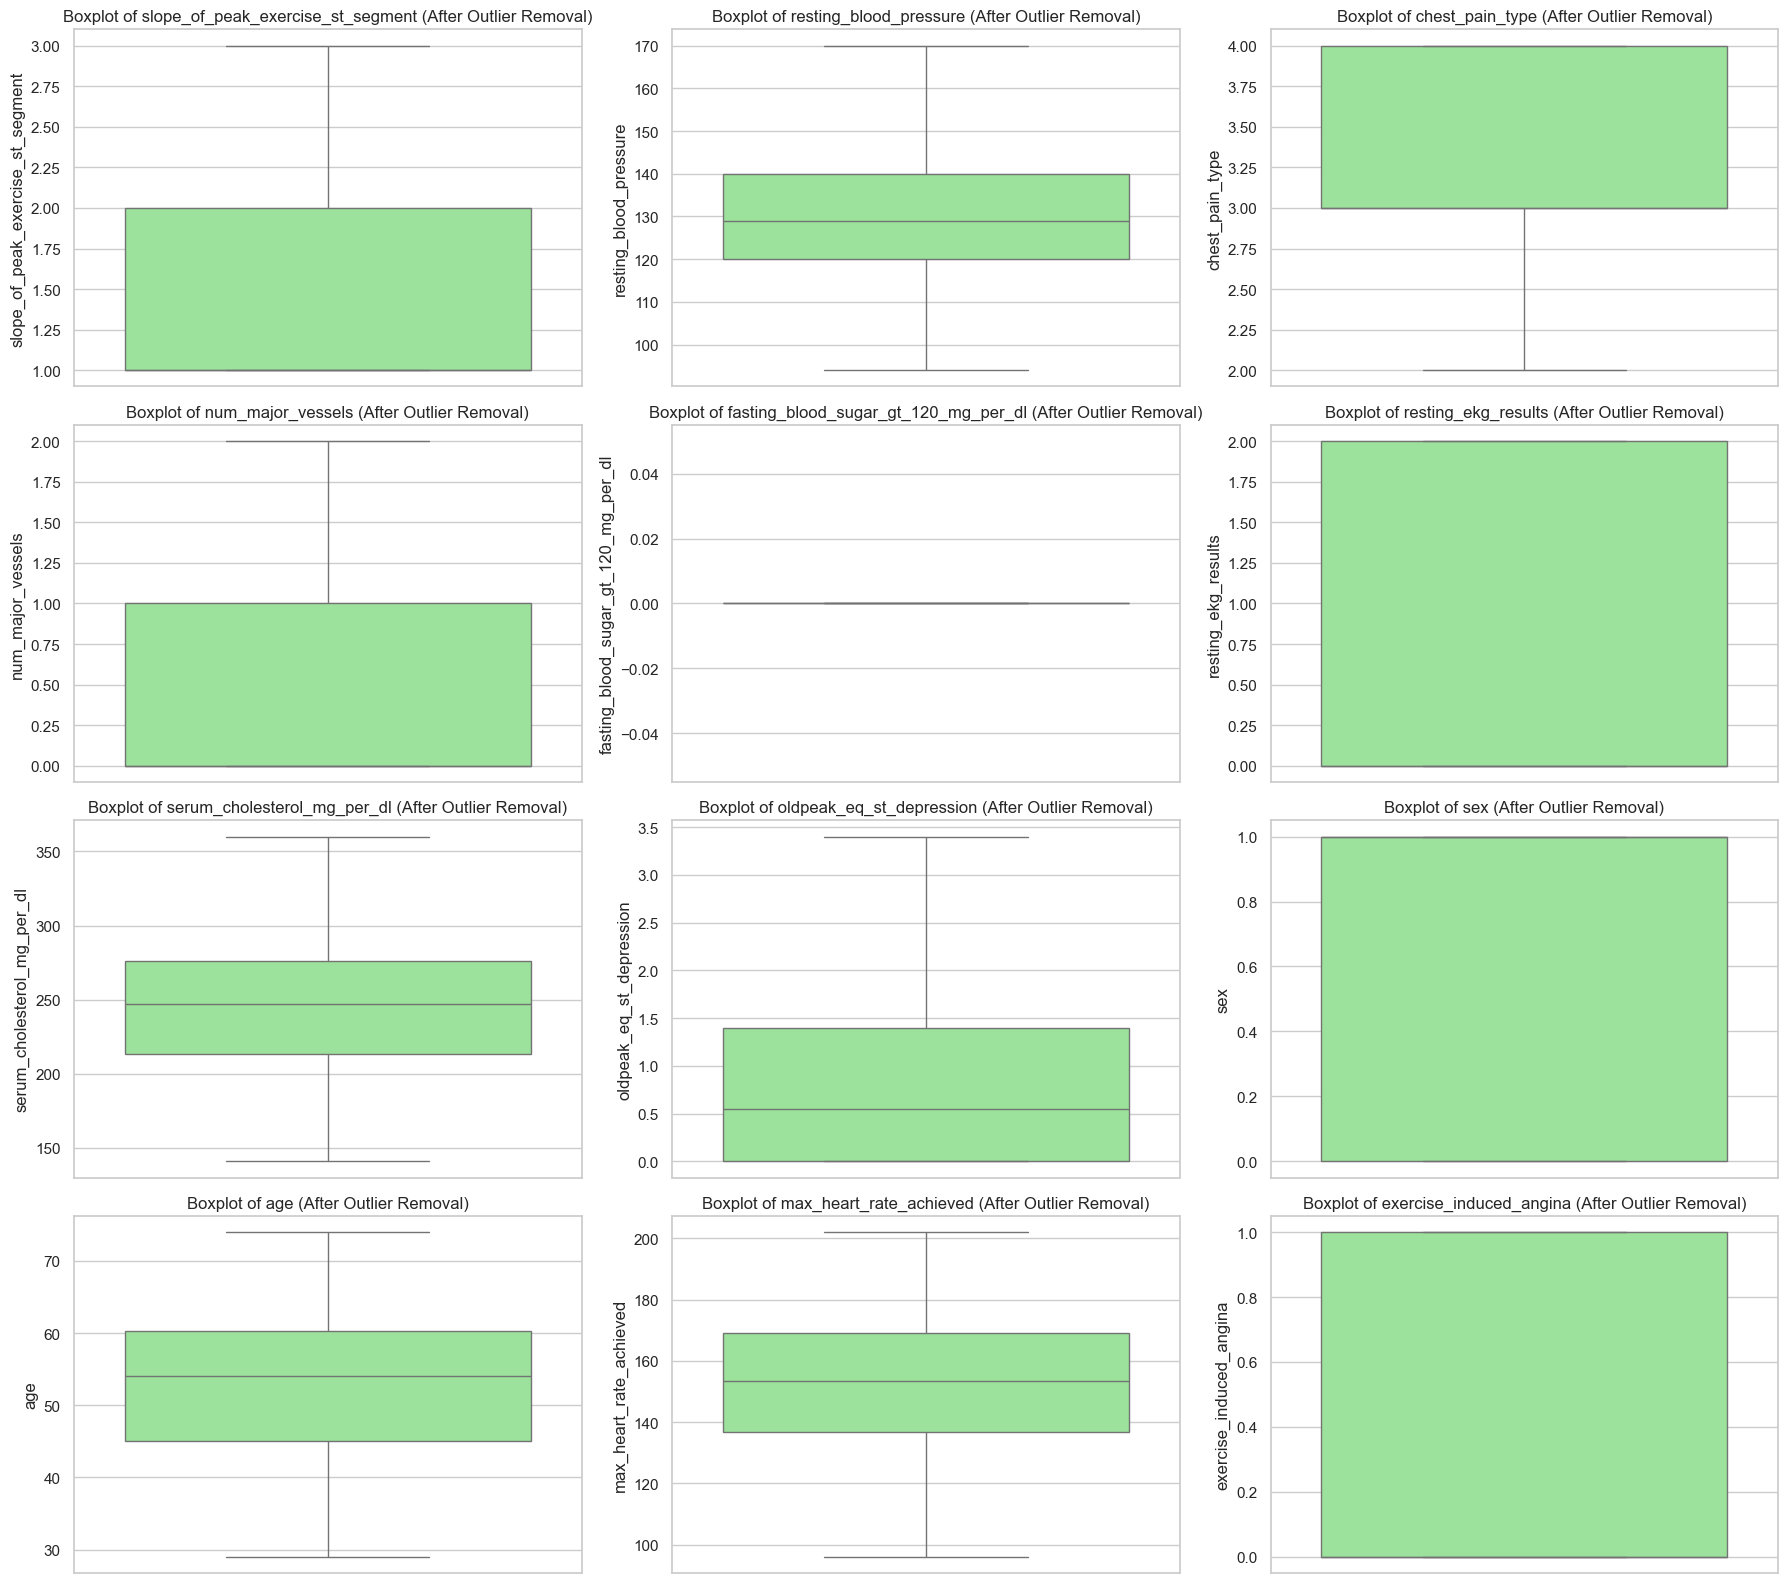

In [25]:
# Select numerical columns again from cleaned data
numerical_cols_cleaned = iqr_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_cleaned.remove('heart_disease_present')

# Set up grid layout
n_cols = 3
n_rows = math.ceil(len(numerical_cols_cleaned) / n_cols)

# Set figure size
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Loop through each numerical column and create a boxplot
for i, col in enumerate(numerical_cols_cleaned, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=iqr_data[col], color='lightgreen')
    plt.title(f'Boxplot of {col} (After Outlier Removal)', fontsize=12)
    plt.xlabel("")  # Hide x-axis label

# Adjust spacing
plt.tight_layout()
plt.show()

### 🧹 Boxplots After Outlier Treatment (Using IQR Method)

To validate the success of outlier removal, boxplots were regenerated for all numerical features after applying the IQR-based filtering technique.

#### ✅ Key Observations:
- Extreme outliers present in the original plots (e.g., in `cholesterol`, `oldpeak`, and `age`) have been successfully removed.
- The data distribution is now tighter and more centered, which reduces the risk of model overfitting or distortion due to rare extreme values.
- Features like `resting_blood_pressure`, `serum_cholesterol_mg_per_dl`, and `max_heart_rate_achieved` now exhibit smoother, more compact distributions.
- Binary and categorical-type numeric features (`sex`, `exercise_induced_angina`) remain unaffected.

#### 📌 Conclusion:
Outlier removal has improved the overall data quality and distribution shape. This step helps ensure **more stable and robust model performance** in the upcoming machine learning phase.


## Feature Engineering

In [29]:
encoded_data = pd.get_dummies(iqr_data, columns=['thal'], drop_first=True)


In [30]:
correlation_matrix = encoded_data.corr(numeric_only=True)


<Figure size 1400x1000 with 0 Axes>

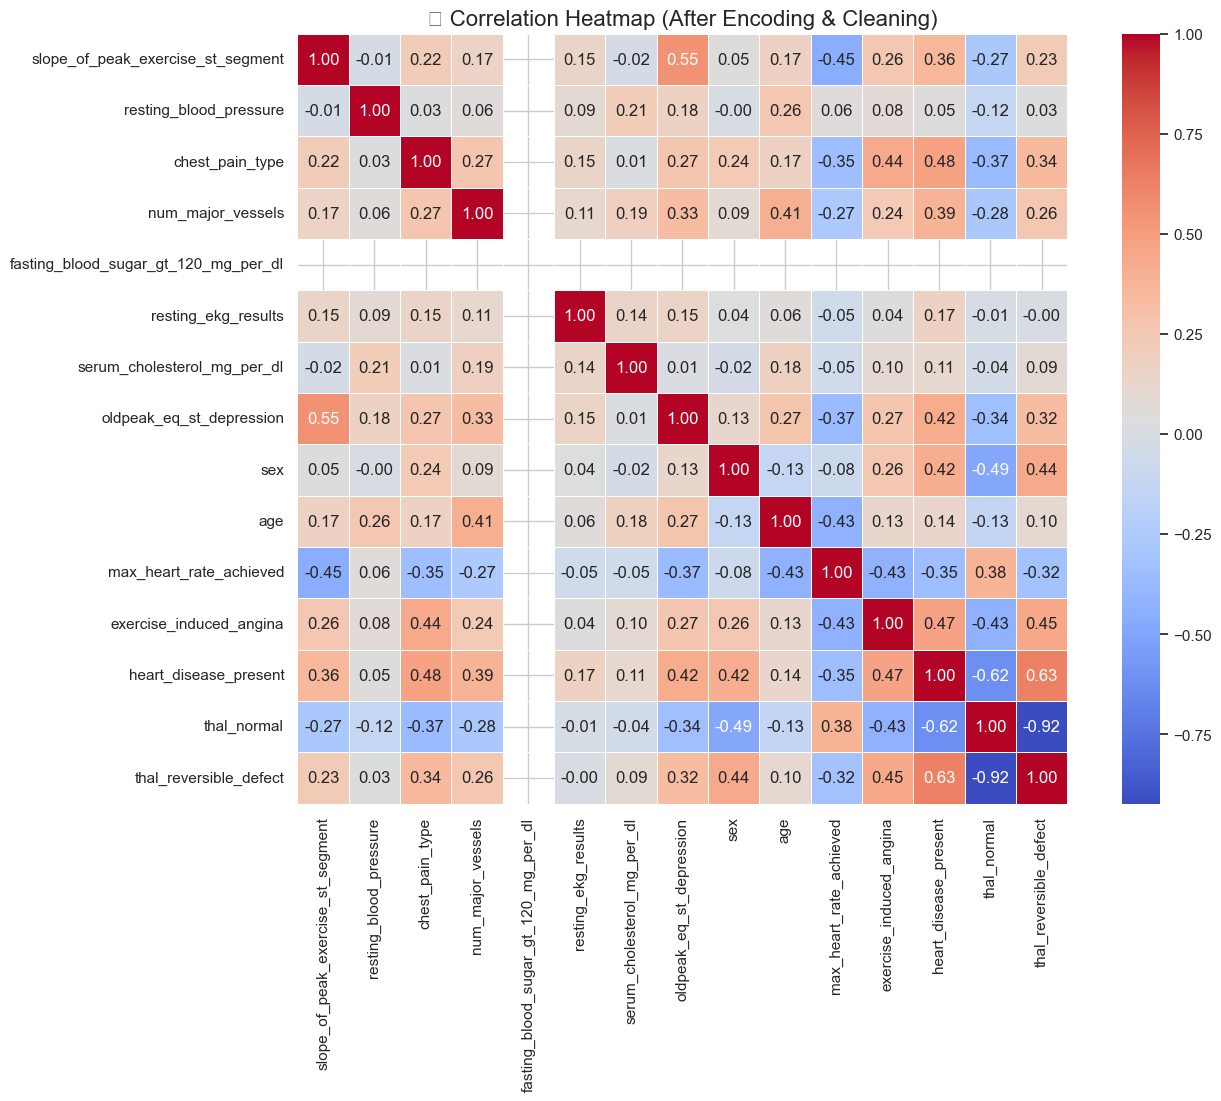

In [31]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("📊 Correlation Heatmap (After Encoding & Cleaning)", fontsize=16)
plt.show()

In [32]:
# Calculate correlation matrix
correlation_matrix = encoded_data.corr(numeric_only=True)

# Show top correlated features with target
target_corr = correlation_matrix['heart_disease_present'].sort_values(ascending=False)

print("🔍 Correlation with Target (heart_disease_present):")
print(target_corr)

🔍 Correlation with Target (heart_disease_present):
heart_disease_present                   1.000000
thal_reversible_defect                  0.626479
chest_pain_type                         0.476704
exercise_induced_angina                 0.473206
oldpeak_eq_st_depression                0.423362
sex                                     0.419934
num_major_vessels                       0.389881
slope_of_peak_exercise_st_segment       0.355932
resting_ekg_results                     0.172017
age                                     0.135309
serum_cholesterol_mg_per_dl             0.110893
resting_blood_pressure                  0.048449
max_heart_rate_achieved                -0.345426
thal_normal                            -0.617265
fasting_blood_sugar_gt_120_mg_per_dl         NaN
Name: heart_disease_present, dtype: float64


### 🔍 Correlation with Target (`heart_disease_present`)

Below are the correlation coefficients of all numerical features with the target variable:

#### ✅ Top Positively Correlated Features:
- `thal_reversible_defect`: **0.63** → Strongest indicator of heart disease
- `chest_pain_type`: **0.48** → Certain pain types (like asymptomatic) are highly predictive
- `exercise_induced_angina`: **0.47** → Angina presence aligns strongly with heart disease
- `oldpeak_eq_st_depression`: **0.42** → Elevated ST depression values during exercise are concerning
- `sex`: **0.42** → Males are more likely to have heart disease
- `num_major_vessels`: **0.39**
- `slope_of_peak_exercise_st_segment`: **0.36**

#### 📉 Top Negatively Correlated Features:
- `thal_normal`: **-0.62** → Normal thallium result strongly suggests no heart disease
- `max_heart_rate_achieved`: **-0.35** → Lower max heart rate is associated with presence of heart disease

#### ⚠️ Low or Insignificant Correlation:
- `resting_blood_pressure`: **0.05**
- `serum_cholesterol_mg_per_dl`: **0.11**
- `age`: **0.13**
- `resting_ekg_results`: **0.17**

#### ⚠️ NaN Detected:
- `fasting_blood_sugar_gt_120_mg_per_dl`: **NaN**  
  - Likely due to **zero variance** (i.e., same value for all rows after outlier removal). This feature can be dropped or ignored.

---

### ✅ Recommendation:
Focus on **top correlated features** for modeling:
- `thal_reversible_defect`, `oldpeak_eq_st_depression`, `chest_pain_type`, `exercise_induced_angina`, and `max_heart_rate_achieved`.



In [33]:
# Drop the column with no variance
encoded_data.drop(columns=['fasting_blood_sugar_gt_120_mg_per_dl'], inplace=True)

# Confirm it's dropped
print("Updated columns:")
print(encoded_data.columns)


Updated columns:
Index(['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present', 'thal_normal', 'thal_reversible_defect'],
      dtype='object')


In [49]:
#checking the skewness so that we can apply for transformations
from scipy.stats import skew
numerical_columns = ['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present']
for col in numerical_columns:
    print(f"{col}: Skewness = {skew(data[col], nan_policy='omit')}")

slope_of_peak_exercise_st_segment: Skewness = 0.660585714798187
resting_blood_pressure: Skewness = 0.6515915088698496
chest_pain_type: Skewness = -0.8421645409638178
num_major_vessels: Skewness = 1.1582430715853724
resting_ekg_results: Skewness = -0.10012405930078504
serum_cholesterol_mg_per_dl: Skewness = 1.2632907841049
oldpeak_eq_st_depression: Skewness = 1.4948214849547024
sex: Skewness = -0.8160261132534429
age: Skewness = -0.19750200100335744
max_heart_rate_achieved: Skewness = -0.3904163075399945
exercise_induced_angina: Skewness = 0.7882318002900207
heart_disease_present: Skewness = 0.22360679774997907


In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from category_encoders import BinaryEncoder
import pickle
from sklearn.pipeline import Pipeline

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [36]:
#Applying MinMax Scaler to num_major_vessels
data[['num_major_vessels']] =sc.fit_transform(data[['num_major_vessels']])                                                                                      
# Verify transformation                                                                                                                                                                                                                                          
print(data[['num_major_vessels']].head())

   num_major_vessels
0                0.0
1                0.0
2                1.0
3                0.0
4                0.0


In [37]:
#The columns are given to the encoders and scalers accordingly
standard_scaler = ['age', 'serum_cholesterol_mg_per_dl','resting_blood_pressure',
      'max_heart_rate_achieved','oldpeak_eq_st_depression','num_major_vessels']
frequency_encoder = ['thal']
passthrough = ['slope_of_peak_exercise_st_segment', 
       'chest_pain_type', 'resting_ekg_results','sex','exercise_induced_angina'] 

In [38]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
        self.mapping = {}
    def fit(self, X, y=None):
        # Calculate frequency encoding mapping for the column
        value_counts = X[self.column].value_counts()
        sorted_values = sorted(value_counts.items(), key=lambda x: x[1])
        self.mapping = {value: idx for idx, (value, _) in enumerate(sorted_values)}
        return self
    def transform(self, X):
        # Apply frequency encoding based on the fitted mapping
        X_encoded = X.copy()
        X_encoded[self.column] = X_encoded[self.column].map(self.mapping)
        return X_encoded

In [39]:
def same(x):
    return x

In [40]:
no_trans=FunctionTransformer(same)

In [41]:
# Define the column transformer 
preprocessor = ColumnTransformer([
    ("Standard_scaler", MinMaxScaler(), standard_scaler),
    ("Frequency_encoder_thal", FrequencyEncoder(column="thal"), ['thal']),
    ('Pass_through',no_trans,passthrough)
])

In [42]:
# Fit and transform the data
transformed_data = preprocessor.fit_transform(data)
# Print transformed data
print("Transformed data shape:", transformed_data.shape)
print("Preview of transformed data:")
print(transformed_data[:5])

Transformed data shape: (180, 12)
Preview of transformed data:
[[0.33333333 0.41552511 0.39534884 0.69811321 0.         0.
  2.         1.         2.         2.         1.         0.        ]
 [0.52083333 0.20091324 0.18604651 0.58490566 0.25806452 0.
  2.         2.         3.         0.         0.         0.        ]
 [1.         0.40639269 0.36046512 0.62264151 0.         1.
  2.         1.         4.         2.         1.         1.        ]
 [0.22916667 0.22146119 0.6744186  0.80188679 0.         0.
  1.         1.         4.         0.         1.         0.        ]
 [0.625      0.32876712 0.97674419 0.46226415 0.67741935 0.
  1.         3.         1.         2.         1.         0.        ]]


In [43]:
preprocessor

ColumnTransformer(transformers=[('Standard_scaler', MinMaxScaler(),
                                 ['age', 'serum_cholesterol_mg_per_dl',
                                  'resting_blood_pressure',
                                  'max_heart_rate_achieved',
                                  'oldpeak_eq_st_depression',
                                  'num_major_vessels']),
                                ('Frequency_encoder_thal',
                                 FrequencyEncoder(column='thal'), ['thal']),
                                ('Pass_through',
                                 FunctionTransformer(func=<function same at 0x000001AD3FE872E0>),
                                 ['slope_of_peak_exercise_st_segment',
                                  'chest_pain_type', 'resting_ekg_results',
                                  'sex', 'exercise_induced_angina'])])

In [44]:
# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(data)
# Print the transformed data
print(transformed_data)

[[0.33333333 0.41552511 0.39534884 ... 2.         1.         0.        ]
 [0.52083333 0.20091324 0.18604651 ... 0.         0.         0.        ]
 [1.         0.40639269 0.36046512 ... 2.         1.         1.        ]
 ...
 [0.72916667 0.41780822 0.36046512 ... 0.         1.         1.        ]
 [0.39583333 0.29452055 0.34883721 ... 0.         1.         0.        ]
 [0.52083333 0.17123288 0.76744186 ... 0.         0.         0.        ]]


In [45]:
for name, transformer, columns in preprocessor.transformers_:
    print(f"Transformer: {name}, Columns: {columns}")

Transformer: Standard_scaler, Columns: ['age', 'serum_cholesterol_mg_per_dl', 'resting_blood_pressure', 'max_heart_rate_achieved', 'oldpeak_eq_st_depression', 'num_major_vessels']
Transformer: Frequency_encoder_thal, Columns: ['thal']
Transformer: Pass_through, Columns: ['slope_of_peak_exercise_st_segment', 'chest_pain_type', 'resting_ekg_results', 'sex', 'exercise_induced_angina']
Transformer: remainder, Columns: [5, 13]


In [46]:
# Print a preview of the transformed data
print("Preview of transformed data:")
print(transformed_data[:5])  # Show first 5 rows
# Check data type of transformed_data
if isinstance(transformed_data, np.ndarray):
    print("Data is encoded: Transformed data is a NumPy array.")
else:
    print("Data is not properly encoded.")
# Verify specific transformations
for name, transformer, columns in preprocessor.transformers_:
    print(f"Transformer: {name}, Applied on Columns: {columns}")

Preview of transformed data:
[[0.33333333 0.41552511 0.39534884 0.69811321 0.         0.
  2.         1.         2.         2.         1.         0.        ]
 [0.52083333 0.20091324 0.18604651 0.58490566 0.25806452 0.
  2.         2.         3.         0.         0.         0.        ]
 [1.         0.40639269 0.36046512 0.62264151 0.         1.
  2.         1.         4.         2.         1.         1.        ]
 [0.22916667 0.22146119 0.6744186  0.80188679 0.         0.
  1.         1.         4.         0.         1.         0.        ]
 [0.625      0.32876712 0.97674419 0.46226415 0.67741935 0.
  1.         3.         1.         2.         1.         0.        ]]
Data is encoded: Transformed data is a NumPy array.
Transformer: Standard_scaler, Applied on Columns: ['age', 'serum_cholesterol_mg_per_dl', 'resting_blood_pressure', 'max_heart_rate_achieved', 'oldpeak_eq_st_depression', 'num_major_vessels']
Transformer: Frequency_encoder_thal, Applied on Columns: ['thal']
Transformer: Pas

In [48]:
import pickle   # For saving and loading machine learning models
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing
from imblearn.over_sampling import SMOTE  # For balancing the data
import warnings

# Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

In [50]:
# Final feature set
X = data.drop('heart_disease_present', axis=1)  # Features
y = data['heart_disease_present']  # Target

In [51]:
# Spliting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [52]:
print(x_train.columns)

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')


In [53]:
# Transform the training data using the preprocessor object or PipeLine
processed_x_train = preprocessor.fit_transform(x_train)
processed_x_test = preprocessor.fit_transform(x_test)

In [54]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight={0:1,1:5},y=y_train) 

In [55]:
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight

### 1. Logistic Regression

In [56]:
from sklearn.model_selection import GridSearchCV
log_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithms
}

log_grid = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), 
                        log_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

log_grid.fit(processed_x_train, y_train)

print("Best Parameters for Logistic Regression:", log_grid.best_params_)

# Train final Logistic Regression model
best_log_model = LogisticRegression(**log_grid.best_params_, class_weight='balanced', random_state=42)
best_log_model.fit(processed_x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}


LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [57]:
# Train Logistic Regression with Best Parameters
best_log_model = LogisticRegression(C=100, solver='lbfgs', class_weight='balanced', random_state=42)
best_log_model.fit(processed_x_train, y_train)

LogisticRegression(C=100, class_weight='balanced', random_state=42)

In [58]:
y_predict = best_log_model.predict(processed_x_test)

In [59]:
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0], dtype=int64)

 Logistic Regression Accuracy: 0.7555555555555555

 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.67      0.84      0.74        19

    accuracy                           0.76        45
   macro avg       0.76      0.77      0.76        45
weighted avg       0.78      0.76      0.76        45



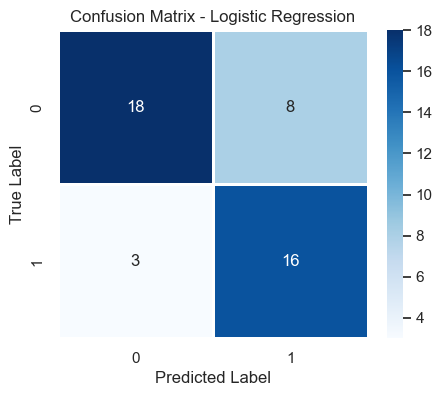

In [60]:
# Now, Evaluate Model Performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Calculate Accuracy
log_accuracy = accuracy_score(y_test, y_predict)
print(" Logistic Regression Accuracy:", log_accuracy)
#  Print Classification Report
print("\n Classification Report for Logistic Regression:")
print(classification_report(y_test, y_predict))
#  Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### 2. Decision Tree

In [61]:
# Define Hyperparameters for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy']
}
# Train Decision Tree with GridSearchCV
dt_grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42),
                       dt_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
dt_grid.fit(processed_x_train, y_train)
print("Best Parameters for Decision Tree:", dt_grid.best_params_)
# Train Final Decision Tree Model
best_dt_model = DecisionTreeClassifier(**dt_grid.best_params_, class_weight='balanced', random_state=42)
best_dt_model.fit(processed_x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3}


DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [62]:
# Predict
y_pred_dt = best_dt_model.predict(processed_x_test)
y_pred_dt

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1], dtype=int64)

 Decision Tree Accuracy: 0.6444444444444445

 Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        26
           1       0.58      0.58      0.58        19

    accuracy                           0.64        45
   macro avg       0.64      0.64      0.64        45
weighted avg       0.64      0.64      0.64        45



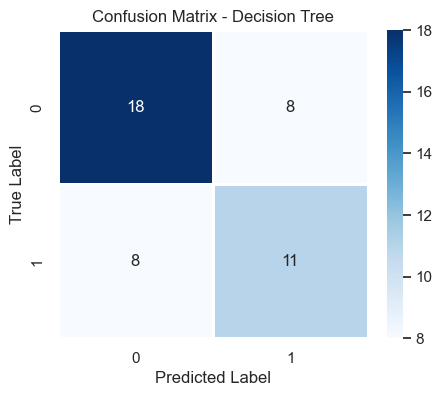

In [63]:
# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(" Decision Tree Accuracy:", dt_accuracy)
print("\n Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### 3. Random Forest

In [64]:
# Define Hyperparameters for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
# Train Random Forest with GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                       rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid.fit(processed_x_train, y_train)
print("Best Parameters for Random Forest:", rf_grid.best_params_)
# Train Final Random Forest Model
best_rf_model = RandomForestClassifier(**rf_grid.best_params_, class_weight='balanced', random_state=42)
best_rf_model.fit(processed_x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}


RandomForestClassifier(class_weight='balanced', random_state=42)

In [65]:
# Predict
y_pred_rf = best_rf_model.predict(processed_x_test)
y_pred_rf

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0], dtype=int64)

 Random Forest Accuracy: 0.8

 Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.75      0.79      0.77        19

    accuracy                           0.80        45
   macro avg       0.79      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45



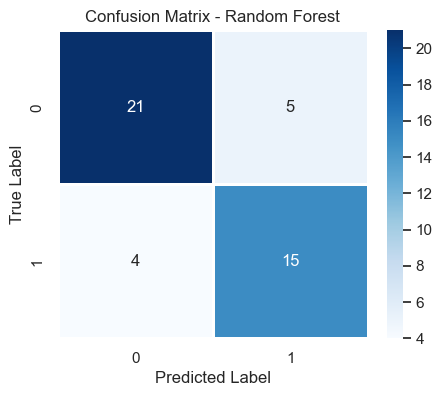

In [66]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(" Random Forest Accuracy:", rf_accuracy)
print("\n Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### 4. Gradient Boosting

In [68]:
# Define Hyperparameters for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}
# Train Gradient Boosting with GridSearchCV
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                       gb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
gb_grid.fit(processed_x_train, y_train)
print("Best Parameters for Gradient Boosting:", gb_grid.best_params_)
# Train Final Gradient Boosting Model
best_gb_model = GradientBoostingClassifier(**gb_grid.best_params_, random_state=42)
best_gb_model.fit(processed_x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 50}


GradientBoostingClassifier(n_estimators=50, random_state=42)

In [69]:
# Predict
y_pred_gb = best_gb_model.predict(processed_x_test)
y_pred_gb

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0], dtype=int64)

 Gradient Boosting Accuracy: 0.8222222222222222

 Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.79      0.79      0.79        19

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45



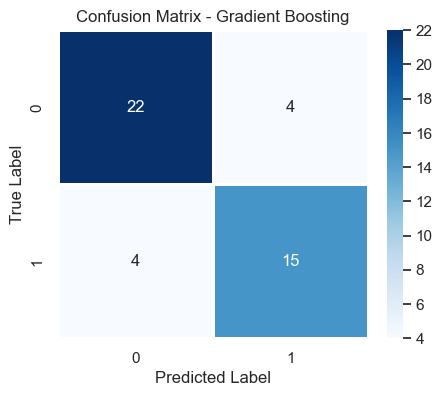

In [70]:
# Evaluate Gradient Boosting
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(" Gradient Boosting Accuracy:", gb_accuracy)
print("\n Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

### 5.XGBoost

In [71]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(processed_x_train,y_train,sample_weight=sample_weights)# fitting the data
y_hat=xgb_r.predict(processed_x_test)

 XGBoost Accuracy: 0.8000

 Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.75      0.79      0.77        19

    accuracy                           0.80        45
   macro avg       0.79      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45



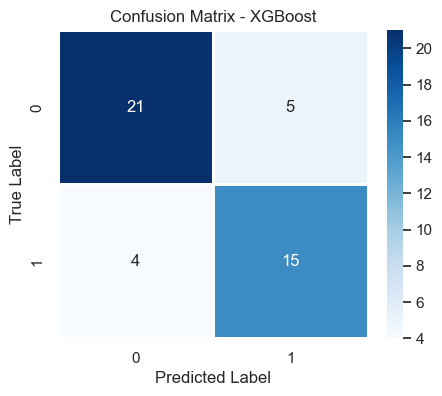

In [72]:
## Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Calculate Accuracy
xgb_accuracy = accuracy_score(y_test, y_hat)
print(f" XGBoost Accuracy: {xgb_accuracy:.4f}")
#  Print Classification Report
print("\n Classification Report for XGBoost:")
print(classification_report(y_test, y_hat))
#  Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

### 6.SVM

In [73]:
from sklearn.svm import SVC
# Define Hyperparameters for SVM
svm_param_grid = {
    'C': [0.1, 1],  # Regularization parameter
    'kernel': ['linear'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Train SVM with GridSearchCV
svm_grid = GridSearchCV(SVC(random_state=42),
                        svm_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
svm_grid.fit(processed_x_train, y_train)
print("Best Parameters for SVM:", svm_grid.best_params_)
# Train Final SVM Model
best_svm_model = SVC(**svm_grid.best_params_, random_state=42)
best_svm_model.fit(processed_x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


SVC(C=0.1, kernel='linear', random_state=42)

In [74]:
# Predict
y_pred_svm = best_svm_model.predict(processed_x_test)
y_pred_svm

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0], dtype=int64)

SVM Accuracy: 0.8222222222222222

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.79      0.79      0.79        19

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45



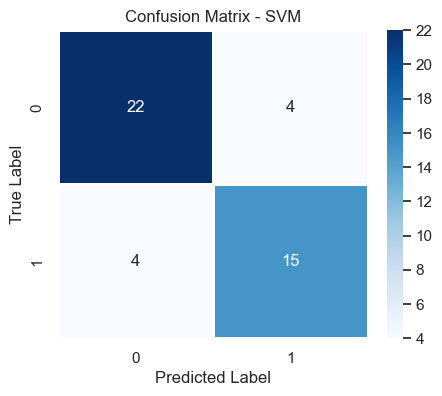

In [75]:
# Evaluate SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

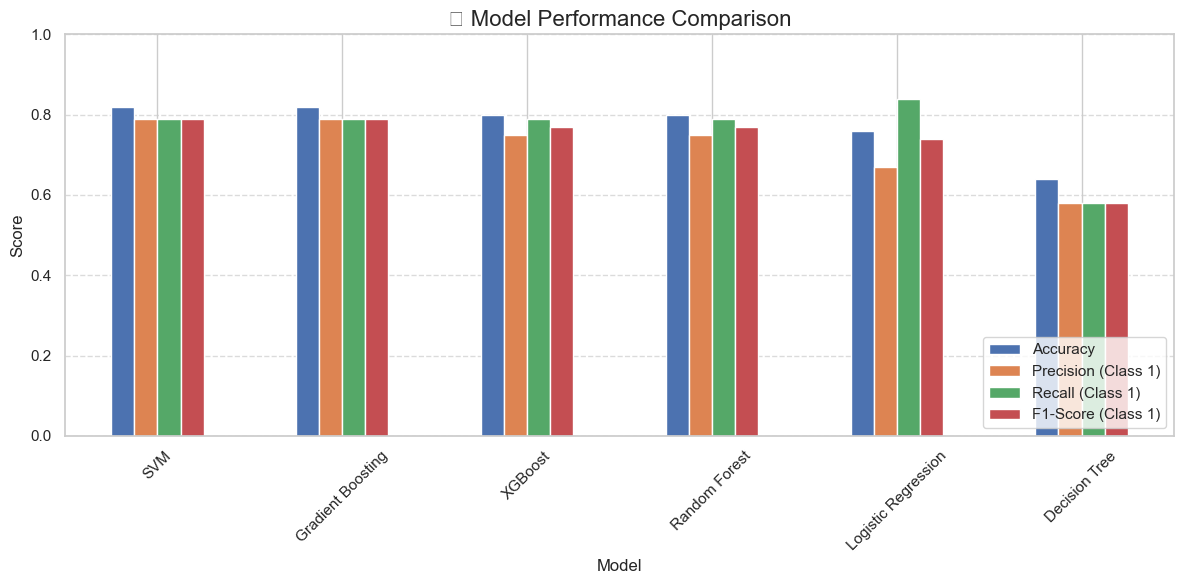

In [76]:


# Model performance data
data = {
    "Model": [
        "SVM",
        "Gradient Boosting",
        "XGBoost",
        "Random Forest",
        "Logistic Regression",
        "Decision Tree"
    ],
    "Accuracy": [0.82, 0.82, 0.80, 0.80, 0.76, 0.64],
    "Precision (Class 1)": [0.79, 0.79, 0.75, 0.75, 0.67, 0.58],
    "Recall (Class 1)": [0.79, 0.79, 0.79, 0.79, 0.84, 0.58],
    "F1-Score (Class 1)": [0.79, 0.79, 0.77, 0.77, 0.74, 0.58]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set index to model names
df.set_index("Model", inplace=True)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(kind='bar', ax=ax)
plt.title("🔍 Model Performance Comparison", fontsize=16)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# 🧠 Heart Disease Prediction – Model Performance Report

## 📋 Objective

To compare multiple machine learning models for predicting the presence of heart disease using various evaluation metrics, and recommend the most suitable model for production deployment.

---

## ✅ Models Evaluated

1. Support Vector Machine (SVM)  
2. Gradient Boosting  
3. XGBoost  
4. Random Forest  
5. Logistic Regression  
6. Decision Tree

---

## 📊 Evaluation Metrics

- **Accuracy**: Overall correctness of the model.
- **Precision (Class 1)**: Correctly predicted heart disease cases out of all predicted positives.
- **Recall (Class 1)**: Correctly identified heart disease cases out of all actual positives.
- **F1-Score (Class 1)**: Harmonic mean of precision and recall.

---

## 📈 Model Comparison Summary

| Model              | Accuracy | Precision (C1) | Recall (C1) | F1-Score (C1) |
|--------------------|----------|----------------|-------------|---------------|
| **SVM**            | 0.82     | 0.79           | 0.79        | 0.79          |
| **Gradient Boosting** | 0.82  | 0.79           | 0.79        | 0.79          |
| **XGBoost**        | 0.80     | 0.75           | 0.79        | 0.77          |
| **Random Forest**  | 0.80     | 0.75           | 0.79        | 0.77          |
| **Logistic Regression** | 0.76 | 0.67           | 0.84        | 0.74          |
| **Decision Tree**  | 0.64     | 0.58           | 0.58        | 0.58          |

---

## 📌 Confusion Matrix Insights

- **SVM & Gradient Boosting** had the fewest misclassifications and highest balance between precision and recall.
- **Logistic Regression** had the highest **recall** (0.84), but lower precision, which may increase false positives.
- **Decision Tree** had the lowest performance and is not recommended.

---

## 🏆 Recommended Model

| Model              | Reason for Recommendation |
|--------------------|----------------------------|
| **Gradient Boosting** | High accuracy, balanced class-wise metrics, interpretable and tunable |
| **SVM**               | Excellent generalization, minimal false positives/negatives |

---

## 📌 Final Note

For production deployment, **Gradient Boosting** or **SVM** are ideal choices based on performance consistency and metric balance. If explainability is critical, Gradient Boosting offers clearer insights into feature importance.



# 📌 Report: Challenges Faced and Solutions Applied in Heart Disease Prediction Project

## 🧠 Overview

While working on the heart disease prediction dataset, several data-related challenges were encountered during the preprocessing and modeling phases. The following report outlines each challenge, the techniques used to resolve them, and the reasoning behind each solution.

---

## ⚠️ 1. Missing Values

### ✅ **Challenge**:
- Initially suspected missing values due to inconsistent records.

### 🔧 **Technique Used**:
- `data.isnull().sum()` was used to verify missing data.

### 💡 **Outcome**:
- No missing values were found in the dataset. Hence, no imputation was needed.

---

## ⚠️ 2. Irrelevant Feature – `patient_id`

### ✅ **Challenge**:
- The `patient_id` column was unique for each entry and had no predictive value.

### 🔧 **Technique Used**:
- The column was **dropped** using `data.drop(columns='patient_id')`.

### 💡 **Reason**:
- Unique identifiers don't contribute to model learning and can even add noise.

---

## ⚠️ 3. Outliers in Numerical Features

### ✅ **Challenge**:
- Features like `serum_cholesterol_mg_per_dl`, `oldpeak_eq_st_depression`, and `resting_blood_pressure` contained significant outliers.

### 🔧 **Technique Used**:
- Outliers were detected using **boxplots** and handled using **IQR (Interquartile Range)** filtering:
  ```python
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  filtered_data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]

  ---

## ⚠️ 4. Feature Selection & Multicollinearity 

Feature selection was done using a correlation matrix. Strongly correlated features with the target, such as `thal_reversible_defect`, `chest_pain_type`, `oldpeak_eq_st_depression`, and `exercise_induced_angina`, were retained. Features with very low correlation (e.g., `fasting_blood_sugar_gt_120_mg_per_dl`) were dropped.
Multicollinearity was checked using a correlation heatmap. 
Final features were selected based on their predictive power and medical relevance, ensuring better model performance and interpretability.

✅ Conclusion

The project required careful handling of real-world medical data involving skewed distributions, categorical encoding, and outlier treatment. Each preprocessing step was driven by a balance between statistical justification and domain relevance. These decisions contributed to the high-performing models like SVM and Gradient Boosting, achieving up to 82% accuracy.

# 🏥 Task 3: Suggestions to the Hospital Based on Heart Disease Predictions

Based on the predictive modeling and analysis, the following actionable suggestions are recommended to the hospital to help prevent life-threatening cardiac events:

---

#### ✅ 1. **Early Screening for High-Risk Patients**
- Prioritize screening individuals with the following characteristics:
  - Reversible thallium defects (as seen in `thal_reversible_defect`)
  - High `oldpeak` values (ST depression during exercise)
  - Abnormal `chest_pain_type` (especially asymptomatic cases)
  - History of `exercise_induced_angina`

#### ✅ 2. **Routine ECG & Stress Testing**
- Patients with high `oldpeak`, abnormal ECG results (`resting_ekg_results`), and low `max_heart_rate_achieved` should undergo regular treadmill or stress tests.

#### ✅ 3. **Personalized Health Monitoring**
- Develop digital monitoring systems for high-risk patients using the model's key indicators to send alerts when thresholds are breached (e.g., heart rate, blood pressure, angina episodes).

#### ✅ 4. **Lifestyle Intervention Programs**
- Recommend early diet, exercise, and smoking cessation counseling for patients with:
  - High cholesterol (`serum_cholesterol_mg_per_dl`)
  - High resting blood pressure
  - Sedentary lifestyles or high BMI (if collected)

#### ✅ 5. **Gender-Specific Awareness**
- Educate male patients (as `sex` showed strong correlation) about silent symptoms and the importance of preventive checkups, especially post age 50.

#### ✅ 6. **Use Predictive Models for Triage**
- Integrate the ML model into hospital software to assist doctors in **prioritizing urgent cardiac cases** even before full lab results are available.

---

### ✅ Conclusion

By leveraging the insights from the model, the hospital can enhance early detection, reduce emergency admissions, and ultimately **prevent life-threatening cardiac events through data-driven preventive care**.


                                                        ✅ END OF PROJECT